In [1]:
from google.colab import drive
import pandas as pd

drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/Kaggle/Kdrama_EDA/top100_kdrama.csv'
df = pd.read_csv(file_path)
df.head()

Mounted at /content/drive


,ID,Title,Genre,Tags,Synopsis,Rank,Popularity,Score,Episodes,Duration,Watchers,Start_date,End_date,Day_aired,Main Role
0,1,Move to Heaven,"Life, Drama","Uncle-Nephew Relationship, Autism, Death, Sava...",Han Geu Roo is a 20-year-old with Autism. He w...,8,94,9.2,10,52,"64,103",5/14/2021,NaN,Friday,"Lee Je Hoon, Tang Jun Sang, Hong Seung Hee"
1,2,Weak Hero Class 1,"Action, Youth, Drama","Smart Male Lead, Bromance, School Bullying, Vi...",Yeon Shi Eun is a model student who ranks at t...,12,290,9.1,8,40,"32,415",11/18/2022,NaN,Friday,"Park Ji Hoon, Hong Kyung, Choi Hyun Wook, Kim ..."
2,3,Hospital Playlist Season 2,"Romance, Life, Drama, Medical","Multiple Mains, Band, Music, Strong Female Lea...",Everyday is extraordinary for five doctors and...,14,177,9.1,12,100,"43,574",6/17/2021,9/16/2021,Thursday,"Jo Jung Suk, Jung Kyung Ho, Jeon Mi Do, Yoo Ye..."
3,4,Flower of Evil,"Thriller, Romance, Crime, Melodrama","Deception, Family Secret, Mystery, Suspense, S...",Although Baek Hee Sung is hiding a dark secret...,16,31,9.1,16,70,"94,811",7/29/2020,9/23/2020,"Wednesday, Thursday","Lee Joon Gi, Jang Hee Jin, Moon Chae Won, Seo ..."
4,5,Hospital Playlist,"Romance, Life, Drama, Medical","Nice Male Lead, Multiple Mains, Slow Romance, ...",The stories of people going through their days...,17,51,9.1,12,90,"81,568",3/12/2020,5/28/2020,Thursday,"Jo Jung Suk, Jung Kyung Ho, Jeon Mi Do, Yoo Ye..."


In [2]:
print(df.shape) # 데이터프레임 크기 확인
print(df.dtypes) # 데이터프레임 열의 데이터 타입 확인

(100, 15)
ID              int64
Title          object
Genre          object
Tags           object
Synopsis       object
Rank            int64
Popularity      int64
Score         float64
Episodes        int64
Duration        int64
Watchers       object
Start_date     object
End_date       object
Day_aired      object
Main Role      object
dtype: object


In [3]:
print(df.isnull().sum())

ID             0
Title          0
Genre          0
Tags           0
Synopsis       0
Rank           0
Popularity     0
Score          0
Episodes       0
Duration       0
Watchers       0
Start_date     0
End_date      12
Day_aired      0
Main Role      0
dtype: int64


In [4]:
print(df.duplicated().sum())

0


In [5]:
df['Genre'] = df['Genre'].apply(lambda x: x.split(', '))
genre_df = df.explode('Genre')

genre_avg_score = genre_df.groupby('Genre')['Score'].mean().sort_values(ascending=False)

print(genre_avg_score)

Genre
Youth            8.925000
Military         8.900000
Life             8.827273
Historical       8.813333
Psychological    8.800000
Melodrama        8.788235
Medical          8.785714
Sci-Fi           8.780000
Action           8.776190
Crime            8.775000
Drama            8.769841
Romance          8.768889
Sports           8.766667
Comedy           8.757143
Fantasy          8.753333
Thriller         8.751515
Law              8.736364
Political        8.736364
Horror           8.733333
Mystery          8.716129
Supernatural     8.712500
Business         8.633333
Food             8.600000
Name: Score, dtype: float64


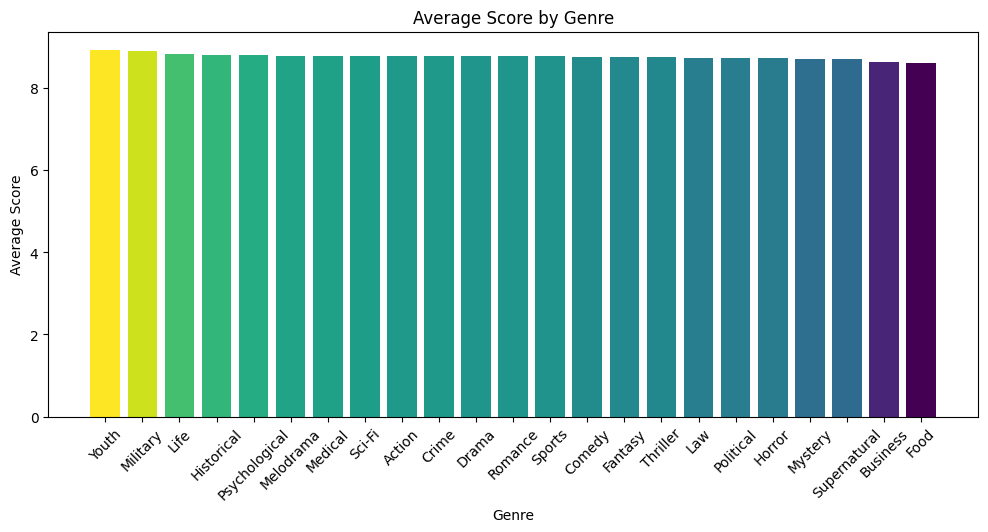

In [6]:
import matplotlib.pyplot as plt

min_score = genre_avg_score.min()
max_score = genre_avg_score.max()

colors = [plt.cm.viridis((score - min_score) / (max_score - min_score)) for score in genre_avg_score]

plt.figure(figsize=(12, 5))
plt.bar(genre_avg_score.index, genre_avg_score, color=colors)
plt.title('Average Score by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Score')
plt.xticks(rotation=45)
plt.show()

In [7]:
from scipy import stats

score_by_genre = [group['Score'].values for _, group in genre_df.groupby('Genre') if len(group['Score'].values) > 1]
f_value, p_value = stats.f_oneway(*score_by_genre)

print(f'F-Value: {f_value}, P-Value: {p_value}')

F-Value: 0.9553094183818044, P-Value: 0.5192357180992946
